<a href="https://colab.research.google.com/github/erickgt00/tesina/blob/main/Tesina_EG_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo predictivo para evaluar la viabilidad de préstamos empresariales de acuerdo a su riesgo de crédito y su garantía inmobiliaria

         Cluster  RiesgoCredito  TipoInmueble     Tamano     Duenos  \
count  30.000000      30.000000     30.000000  30.000000  30.000000   
mean    1.333333      55.000000     69.000000  55.000000  42.833333   
std     1.124441      35.477045     21.908902  16.609096  19.682100   
min     0.000000      15.000000     35.000000  40.000000  30.000000   
25%     0.000000      15.000000     42.500000  40.000000  30.000000   
50%     1.000000      50.000000     85.000000  40.000000  30.000000   
75%     2.000000     100.000000     85.000000  75.000000  65.000000   
max     3.000000     100.000000     85.000000  75.000000  80.000000   

         CostoM2      Valor   Habitado   Posesion  Ubicación  ...  Servicios  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  ...  30.000000   
mean   50.333333  61.666667  54.333333  62.000000  43.166667  ...  26.333333   
std    12.452207  17.036135  34.309276  27.965496  15.673574  ...  28.129422   
min    40.000000  30.000000  10.000000  

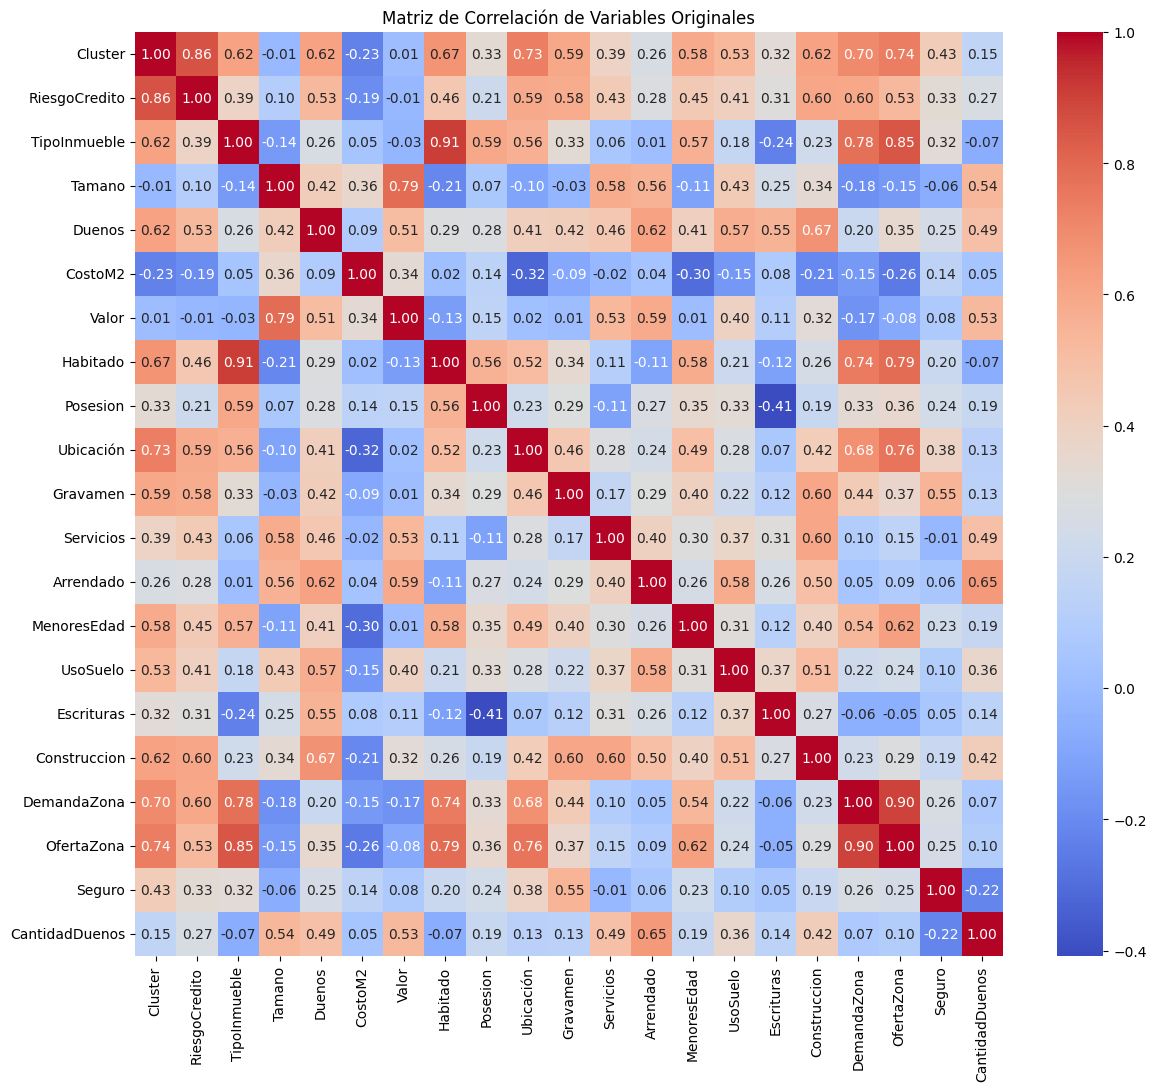

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV con los 30 datos originales
file_path_csv = 'BaseDatosSofoms.csv'
original_data_df = pd.read_csv(file_path_csv)

# Descripción estadística de los datos originales
description = original_data_df.describe()

# Calcular la matriz de correlación
correlation_matrix = original_data_df.corr()

# Matriz de correlación
print(description)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Originales')
plt.show()


## Puntos Clave de la Matriz de Correlación:
###Correlación con "Cluster":

* RiesgoCredito: 0.86 (Fuerte correlación positiva)
* TipoInmueble: 0.62 (Fuerte correlación positiva)
* Habitado: 0.67 (Fuerte correlación positiva)
* Ubicación: 0.73 (Fuerte correlación positiva)
* DemandaZona: 0.70 (Fuerte correlación positiva)
* OfertaZona: 0.74 (Fuerte correlación positiva)

### Otras Correlaciones Notables:

* TipoInmueble y Habitado: 0.91 (Fuerte correlación positiva)
* DemandaZona y OfertaZona: 0.90 (Fuerte correlación positiva)
* Duenos y Construccion: 0.67 (Moderada correlación positiva)

### Interpretación:

* Cluster muestra una fuerte correlación positiva con variables como RiesgoCredito, TipoInmueble, Habitado, Ubicación, DemandaZona, y OfertaZona, indicando que estas variables influyen significativamente en la categorización de los proyectos.
* TipoInmueble y Habitado tienen una fuerte correlación positiva entre sí, lo que sugiere que los tipos de inmueble están relacionados con si están habitados o no.
* DemandaZona y OfertaZona también tienen una fuerte correlación positiva, lo que indica que estas dos variables están estrechamente relacionadas en los datos.

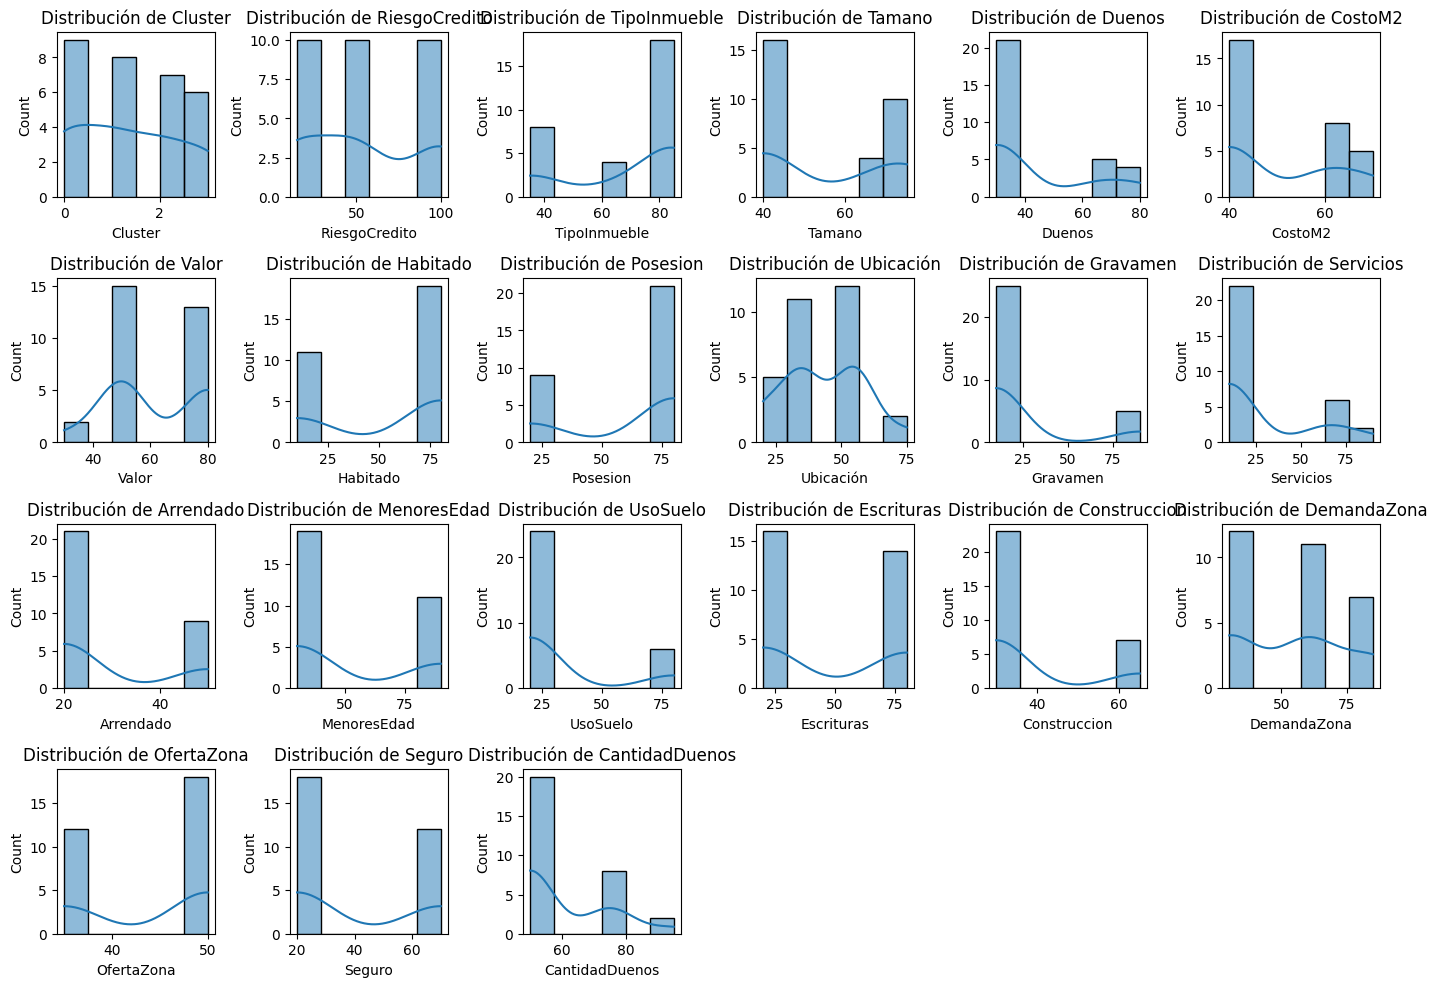

In [ ]:
# Visualización de distribuciones individuales
variables_to_plot = original_data_df.columns

plt.figure(figsize=(14, 12))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(5, 6, i)
    sns.histplot(original_data_df[var], kde=True)
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

* Cluster: La distribución de 'Cluster' muestra una variabilidad considerable en los diferentes grupos, con algunos clusters más representados que otros. Esto sugiere una segmentación efectiva basada en características subyacentes de los datos.
* RiesgoCrédito: La distribución de 'RiesgoCrédito' es amplia, con un sesgo hacia valores más bajos de riesgo. Esto indica que la mayoría de las propiedades tienen un riesgo de crédito relativamente bajo, lo cual es favorable para los prestamistas.
* TipodeInmueble: La variable 'TipodeInmueble' presenta una distribución bimodal, con dos picos distintos. Esto puede indicar la existencia de dos categorías principales de inmuebles en el dataset, como residenciales y comerciales.
* Tamaño: La distribución de 'Tamaño' muestra una tendencia hacia tamaños específicos de propiedades, con un número considerable de propiedades en ciertos rangos. Esto puede estar relacionado con estándares de construcción o zonificación.
* Dueños: La variable 'Dueños' tiene una distribución sesgada hacia la izquierda, indicando que la mayoría de las propiedades tienen pocos propietarios registrados, lo cual puede simplificar el proceso de crédito.
* CostoM2:
La distribución de 'CostoM2' es variada, reflejando una amplia gama de valores por metro cuadrado, lo cual es común en mercados inmobiliarios diversificados.
* Valor:
La distribución del 'Valor' de las propiedades muestra un sesgo hacia valores más bajos, similar a 'RiesgoCrédito', lo que puede indicar una correlación entre el valor total de la propiedad y su riesgo de crédito.
* Habitado:
La variable 'Habitado' tiene una distribución bimodal, sugiriendo que las propiedades tienden a estar claramente ocupadas o desocupadas, sin muchos valores intermedios.
* Posesión:
La distribución de 'Posesión' indica que la mayoría de las propiedades tienen un estatus claro de posesión, lo cual es crucial para evaluar la seguridad de la garantía inmobiliaria.
* Ubicación:
La variable 'Ubicación' muestra una distribución bastante uniforme, reflejando una diversidad de ubicaciones geográficas dentro del conjunto de datos.
* Gravamen:
La distribución de 'Gravamen' sugiere que muchas propiedades tienen algún tipo de gravamen, lo cual es un factor importante a considerar en la evaluación del riesgo.
* Servicios:
La variable 'Servicios' presenta una distribución sesgada hacia propiedades con más servicios disponibles, lo cual podría influir positivamente en su valor y reducir el riesgo.
* Arrendado:
La distribución de 'Arrendado' muestra una alta concentración en propiedades que están arrendadas, lo cual puede proporcionar una fuente de ingresos adicional y mitigar el riesgo crediticio.
* MenoresEdad:
La variable 'MenoresEdad' tiene una distribución dispersa, indicando una diversidad en el número de menores de edad en las propiedades, lo cual puede estar relacionado con el uso residencial.
* UsoSuelo:
La distribución de 'UsoSuelo' sugiere una diversidad en los tipos de uso del suelo, lo cual es importante para la valoración de las propiedades.
* Escrituras:
La variable 'Escrituras' muestra una alta concentración en propiedades con escrituras, lo cual es esencial para la transferencia legal y la seguridad del crédito.
* Construcción:
La distribución de 'Construcción' indica una variabilidad en los años de construcción de las propiedades, reflejando un rango de antigüedades y calidades constructivas.
* DemandaZona:
La variable 'DemandaZona' muestra una distribución uniforme, lo cual puede implicar una estabilidad en la demanda de propiedades en diferentes zonas.
* OfertaZona:
La distribución de 'OfertaZona' es similar a la de 'DemandaZona', lo cual es lógico ya que la oferta tiende a equilibrarse con la demanda.
* Seguro:
La variable 'Seguro' presenta una concentración en propiedades con seguro, lo cual puede reducir el riesgo para los prestamistas.
* CantidadDueños:
La distribución de 'CantidadDueños' es sesgada hacia propiedades con menos dueños, lo cual simplifica la gestión del crédito y reduce el riesgo asociado.

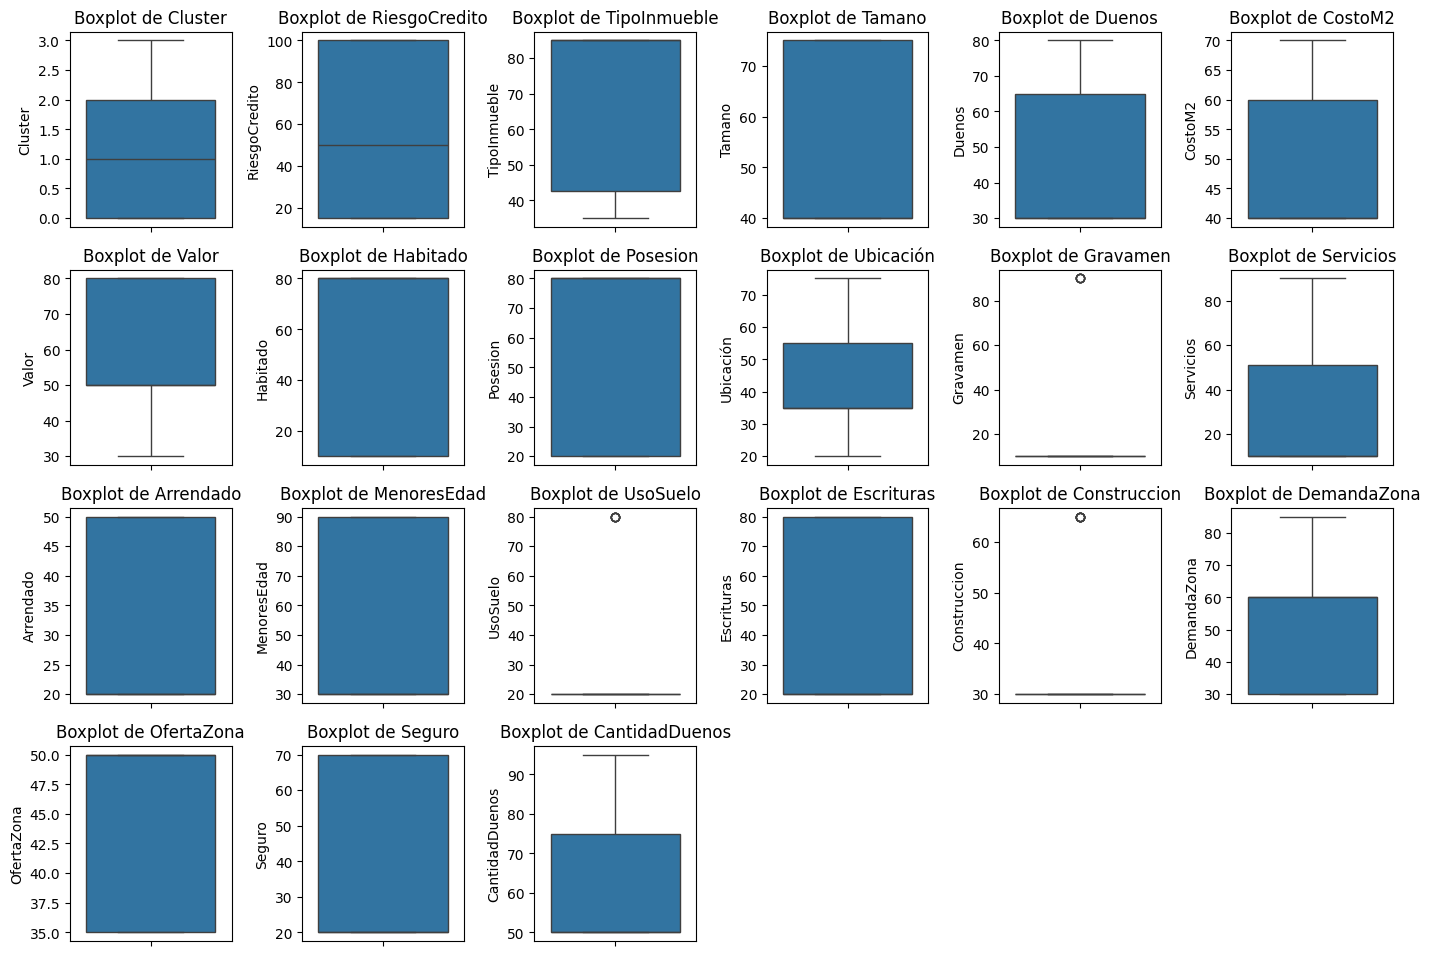

In [ ]:
# Visualización de diagramas de caja (boxplots) para detectar outliers
plt.figure(figsize=(14, 12))
for i, var in enumerate(original_data_df.columns, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=original_data_df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

Los únicos valores atípicos encontrados son en Gravamen, Uso de Suelo y Construcción, de los cuales no será necesario removerlos debido que pertenecen en esa clasificación original de los clientes actuales.

### Creación de los 50k datos sintéticos

In [ ]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import RandomForestClassifier

# Obtener la matriz de covarianza de los datos originales
covariance_matrix = EmpiricalCovariance().fit(original_data_df)

# Generar datos sintéticos
synthetic_data = np.random.multivariate_normal(
    mean=original_data_df.mean(),
    cov=covariance_matrix.covariance_,
    size=50000
)

# Convertir los datos sintéticos a un DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data, columns=original_data_df.columns)

print(synthetic_data_df.head())

    Cluster  RiesgoCredito  TipoInmueble     Tamano     Duenos    CostoM2  \
0  0.559786      27.163032     31.911744  75.778891  50.104764  59.474738   
1  0.428644      40.636195     50.913921  79.538539  25.053549  52.333272   
2  3.241141     131.682647    116.516699  59.021115  71.262081  50.466030   
3  1.046189      36.953537     57.198980  54.501332  48.004887  59.136157   
4 -0.440334      15.862967     57.023291  70.554002  28.962653  56.093077   

       Valor    Habitado   Posesion  Ubicación  ...  Servicios  Arrendado  \
0  92.628595   -7.696700  51.986278  22.666275  ...  67.948780  63.127524   
1  83.108984   26.435962  87.627984  35.788512  ...  20.630082  23.459376   
2  71.467175  108.502274  83.224061  71.287746  ...  64.745359  36.283651   
3  62.773256   34.085793  46.915444  32.844463  ...  27.810190  21.224108   
4  77.283635   21.401059  34.573020  19.844855  ...  38.921440  33.750861   

   MenoresEdad   UsoSuelo  Escrituras  Construccion  DemandaZona  OfertaZo

In [ ]:
# Mapeo de valores de riesgo para cada variable basado en las variables originales
value_mappings = {
    'Cluster': [0, 1, 2, 3],
    'RiesgoCredito': [15, 50, 100],
    'TipoInmueble': [85, 65, 35, 40],
    'Tamano': [75, 65, 40],
    'Duenos': [30, 40, 60, 80],
    'CostoM2': [70, 40, 60],
    'Valor': [30, 50, 80],
    'Habitado': [80, 10],
    'Posesion': [20, 80],
    'Ubicación': [20, 35, 55, 85, 100],
    'Gravamen': [10, 90],
    'Servicios': [10,65,90],
    'Arrendado': [20, 50],
    'MenoresEdad': [30, 90],
    'UsoSuelo': [20, 80],
    'Escrituras': [20, 80],
    'Construccion': [30, 50, 65],
    'DemandaZona': [30, 60, 85],
    'OfertaZona': [35, 60, 75],
    'Seguro': [20, 70],
    'CantidadDuenos': [20, 50, 75, 85, 95]
}

# Función para ajustar valores al valor más cercano disponible en el mapeo
def adjust_to_closest_value(series, valid_values):
    return series.apply(lambda x: min(valid_values, key=lambda y: abs(y - x)))

# Ajustar cada columna a los valores discretos correspondientes
for column, valid_values in value_mappings.items():
    synthetic_data_df[column] = adjust_to_closest_value(synthetic_data_df[column], valid_values)

print(synthetic_data_df.head())

   Cluster  RiesgoCredito  TipoInmueble  Tamano  Duenos  CostoM2  Valor  \
0        1             15            35      75      60       60     80   
1        0             50            40      75      30       60     80   
2        3            100            85      65      80       60     80   
3        1             50            65      65      40       60     50   
4        0             15            65      75      30       60     80   

   Habitado  Posesion  Ubicación  ...  Servicios  Arrendado  MenoresEdad  \
0        10        80         20  ...         65         50           30   
1        10        80         35  ...         10         20           30   
2        80        80         85  ...         65         50           90   
3        10        20         35  ...         10         20           30   
4        10        20         20  ...         65         20           30   

   UsoSuelo  Escrituras  Construccion  DemandaZona  OfertaZona  Seguro  \
0        20       

In [ ]:
# Guardar los datos ajustados en un archivo CSV
adjusted_synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df.to_csv(adjusted_synthetic_data_file_path, index=False)

print(f'Datos ajustados guardados en: {adjusted_synthetic_data_file_path}')

Datos ajustados guardados en: corrected_synthetic_data_final.csv


           Cluster  RiesgoCredito  TipoInmueble        Tamano        Duenos  \
count  50000.00000   50000.000000  50000.000000  50000.000000  50000.000000   
mean       1.35818      54.859900     66.961000     55.806700     45.242000   
std        0.98565      31.494201     17.576139     14.397114     15.633372   
min        0.00000      15.000000     35.000000     40.000000     30.000000   
25%        1.00000      15.000000     65.000000     40.000000     30.000000   
50%        1.00000      50.000000     65.000000     65.000000     40.000000   
75%        2.00000     100.000000     85.000000     65.000000     60.000000   
max        3.00000     100.000000     85.000000     75.000000     80.000000   

            CostoM2         Valor      Habitado      Posesion     Ubicación  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      51.359800     60.731000     52.690200     60.179600     42.908000   
std       11.513627     17.471169     34.145046    

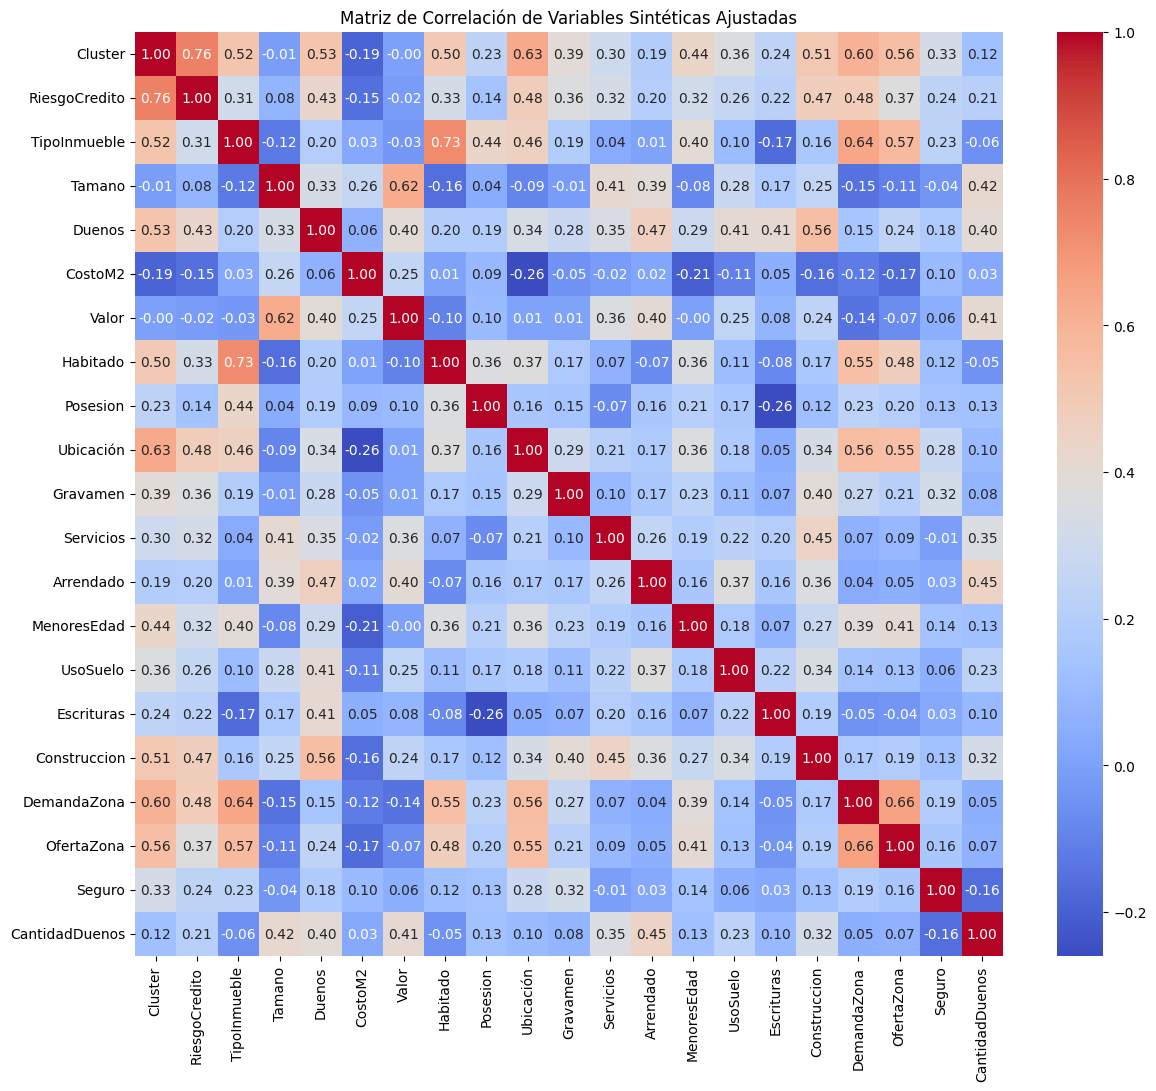

In [ ]:
# Recalcular las estadísticas descriptivas y la matriz de correlación después del ajuste
adjusted_synthetic_description_final = synthetic_data_df.describe()
adjusted_synthetic_correlation_matrix_final = synthetic_data_df.corr()

# Mostrar la descripción y la matriz de correlación ajustada
print(adjusted_synthetic_description_final)
plt.figure(figsize=(14, 12))
sns.heatmap(adjusted_synthetic_correlation_matrix_final, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Sintéticas Ajustadas')
plt.show()


###Correlación con "Cluster" VS Datos Originales:

* RiesgoCredito: 0.86 VS 0.76
* TipoInmueble: 0.62 Vs 0.52
* Habitado: 0.67 VS 0.50
* Ubicación: 0.73 0.63
* DemandaZona: 0.70 VS 0.60
* OfertaZona: 0.74 0.56

De lo anterior podemos concluir que efectivamente siguen propiedades muy similares con los datos originales

#Modelo de Predicción

In [ ]:
import pandas as pd

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
original_data_file_path = 'BaseDatosSofoms.csv'

# Leer los datos
synthetic_data_df = pd.read_csv(synthetic_data_file_path)
original_data_df = pd.read_csv(original_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

X_test = original_data_df.drop(columns=['Cluster'])
y_test = original_data_df['Cluster']

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=30887db175eee4483b67b773854c11cd3c11e12ccf31e55aef3469b9150bde59
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: RandomForest
Exactitud: 0.7666666666666667
Matriz de confusión:
[[8 1 0 0]
 [2 5 1 0]
 [0 1 4 2]
 [0 0 0 6]]


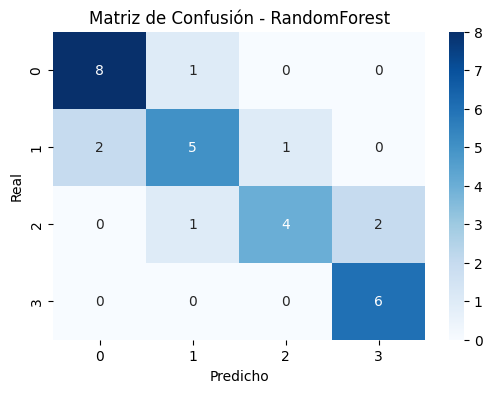

Modelo: LogisticRegression
Exactitud: 0.9333333333333333
Matriz de confusión:
[[7 2 0 0]
 [0 8 0 0]
 [0 0 7 0]
 [0 0 0 6]]


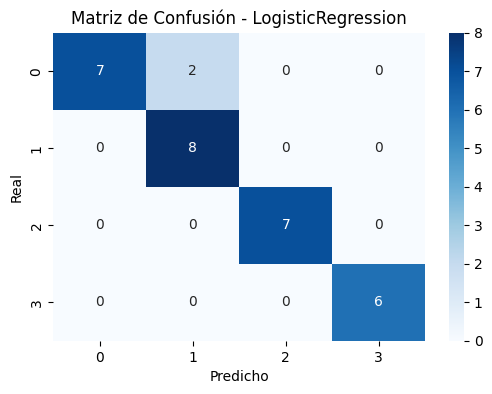

Modelo: SVM
Exactitud: 1.0
Matriz de confusión:
[[9 0 0 0]
 [0 8 0 0]
 [0 0 7 0]
 [0 0 0 6]]


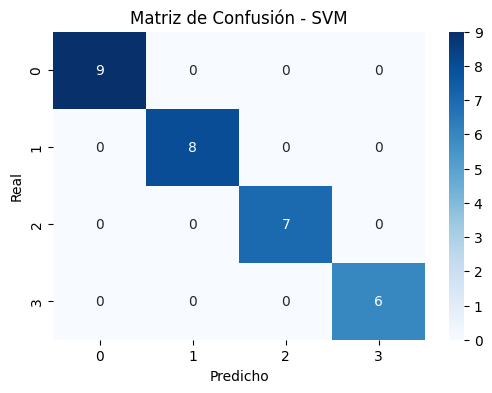

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True)  # Habilitar probability=True
}

# Entrenar y evaluar los modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'confusion_matrix': cm,
        'accuracy': accuracy
    }

# Mostrar los resultados
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud: {result['accuracy']}")
    print("Matriz de confusión:")
    print(result['confusion_matrix'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

### Importancia de las características

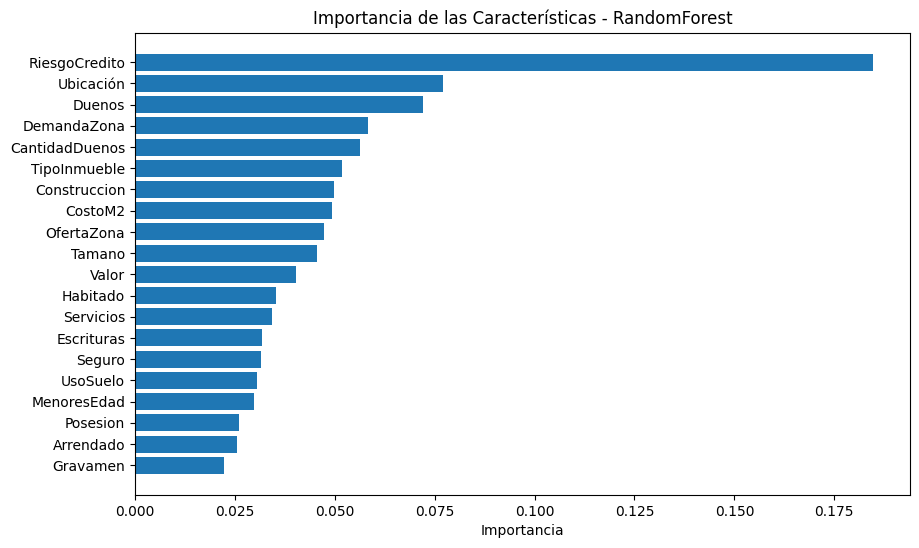

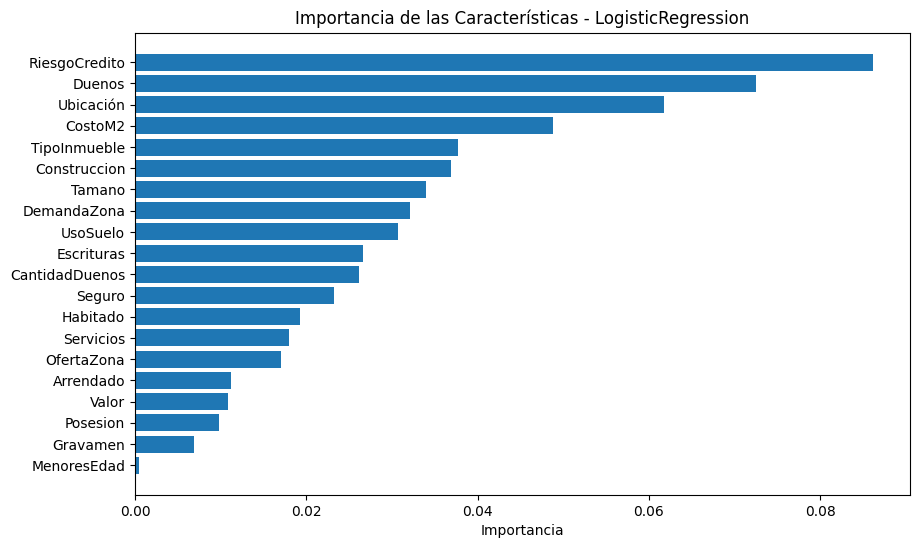

In [ ]:
# Analizar la importancia de las características
def plot_feature_importances(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Importancia de las Características - {model_name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Importancia')
        plt.gca().invert_yaxis()
        plt.show()
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Importancia de las Características - {model_name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Importancia')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print(f"El modelo {model_name} no soporta la extracción de importancias de características.")

# Nombrar características
feature_names = X_train.columns

# Graficar la importancia de las características para RandomForest, LogisticRegression y SVM lineal
for name, result in results.items():
    if name in ['RandomForest', 'LogisticRegression']:
        plot_feature_importances(result['model'], feature_names, name)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


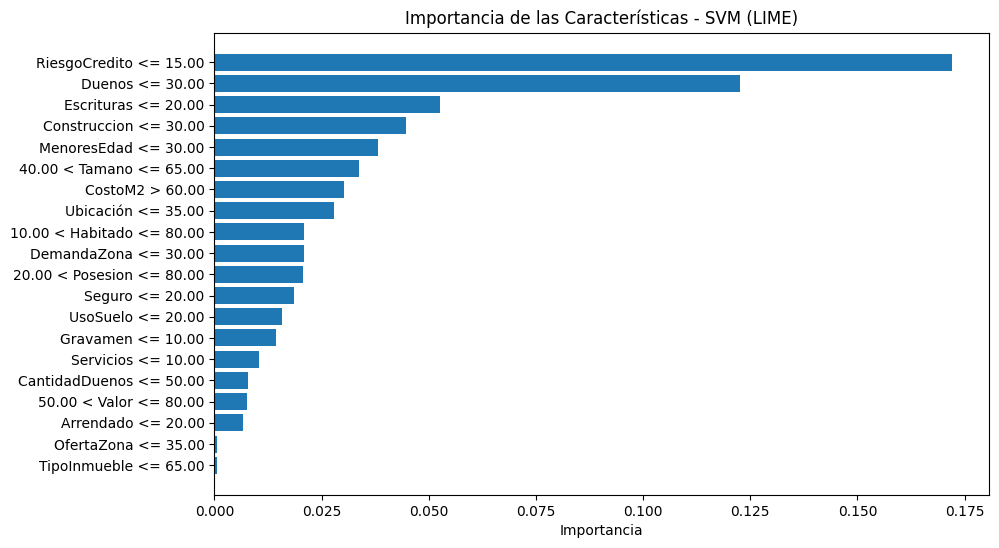

In [ ]:
# Usar LIME para calcular la importancia de las características para un SVM no lineal
if 'SVM' in results:
    explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['Clase 0', 'Clase 1'], discretize_continuous=True)
    i = 0  # Ejemplo de la primera instancia en el conjunto de prueba
    exp = explainer.explain_instance(X_test.values[i], results['SVM']['model'].predict_proba, num_features=len(feature_names))
    exp.show_in_notebook(show_table=True, show_all=False)

    # Obtener las importancias de LIME y graficarlas
    lime_importances = dict(exp.as_list())
    lime_importances = {k: abs(v) for k, v in lime_importances.items()}  # Convertir a valores absolutos
    sorted_importances = sorted(lime_importances.items(), key=lambda item: item[1], reverse=True)

    features = [item[0] for item in sorted_importances]
    importances = [item[1] for item in sorted_importances]

    plt.figure(figsize=(10, 6))
    plt.title('Importancia de las Características - SVM (LIME)')
    plt.barh(range(len(importances)), importances, align='center')
    plt.yticks(range(len(importances)), features)
    plt.xlabel('Importancia')
    plt.gca().invert_yaxis()
    plt.show()

### Posibles Conclusiones y Sobreajuste
* Exactitud encima del 80%: En RandomForest y SVM nos dieron una exactitud por encima del 80% lo cual puede ser una señal de sobreajuste (overfitting), especialmente considerando que los datos de entrenamiento fueron generados sintéticamente y podrían no representar todas las variabilidades del mundo real.

* Generalización: Un modelo sobreajustado puede funcionar extremadamente bien en los datos de entrenamiento y prueba disponibles, pero puede fallar al generalizar a nuevos datos no vistos. Dado que los datos de prueba son solo 30 instancias y los datos de entrenamiento son 50,000 instancias sintéticas, existe la posibilidad de que los modelos hayan aprendido características específicas de los datos sintéticos que no se generalizan bien.

###¿Qué podemos hacer?
* Validación Cruzada: Implementar validación cruzada (cross-validation) para evaluar el desempeño del modelo en múltiples subconjuntos de los datos. Esto ayuda a garantizar que el modelo generalice bien y no esté sobreajustado.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Modelo: RandomForest
Exactitud media: 0.71522
Desviación estándar de la exactitud: 0.002917807395973906


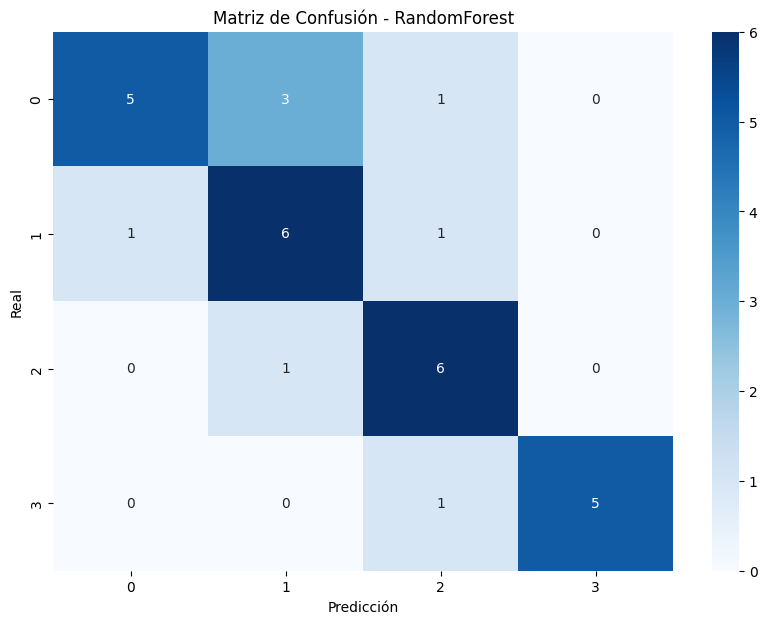

Modelo: LogisticRegression
Exactitud media: 0.74224
Desviación estándar de la exactitud: 0.005684575621803267


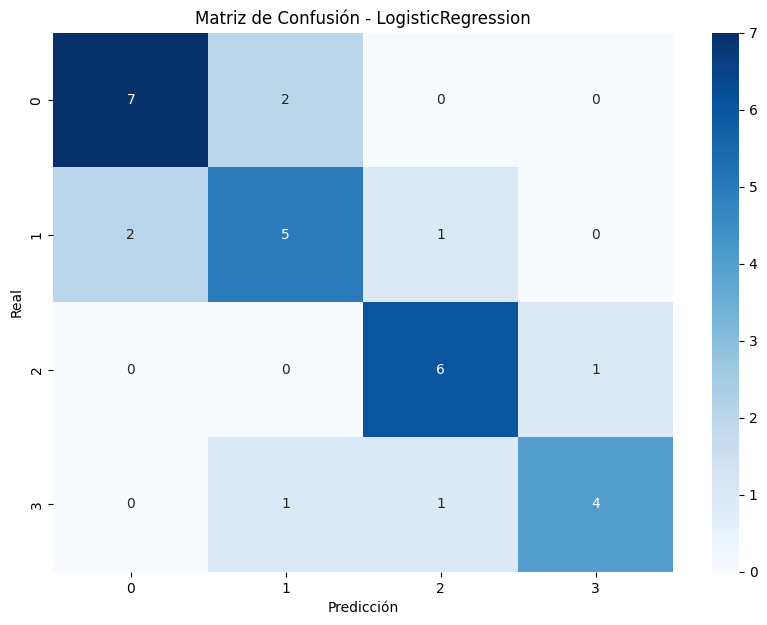

Modelo: SVM
Exactitud media: 0.74516
Desviación estándar de la exactitud: 0.003645600087777073


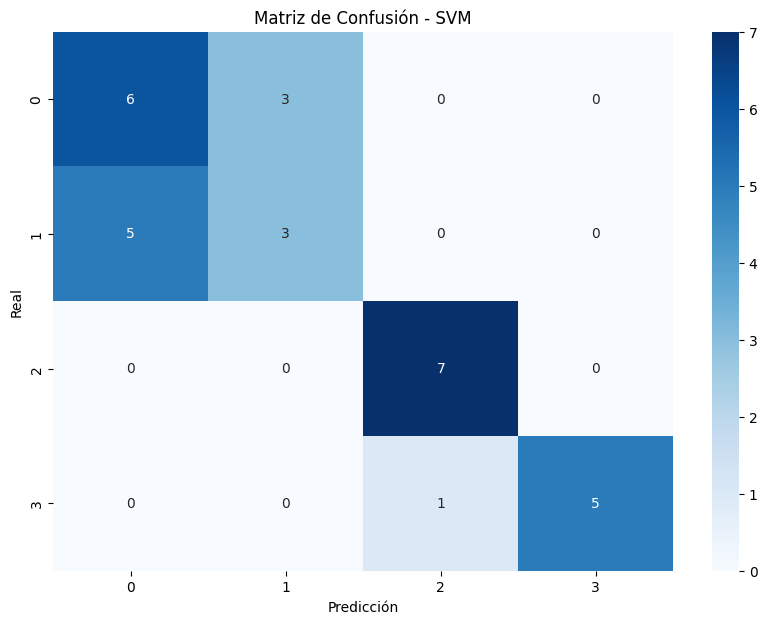

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Evaluar los modelos con validación cruzada
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)  # Predicciones de validación cruzada
    cm = confusion_matrix(y_test, y_pred)  # Matriz de confusión

    cv_results[name] = {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std(),
        'confusion_matrix': cm
    }

# Mostrar los resultados de la validación cruzada y las matrices de confusión
for name, result in cv_results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud media: {result['mean_accuracy']}")
    print(f"Desviación estándar de la exactitud: {result['std_accuracy']}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


Como podemos ver, los 3 modelos arrojaron una presición encima del 70% en la validación cruzada por lo que podemos inferir que tiene una buena y gran probabilidad de predecir correctamente la clasificación que buscamos

#Predecir un nuevo cliente

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df = pd.read_csv(synthetic_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

# Entrenar el modelo seleccionado (en este caso, RandomForest por su mejor desempeño)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Función para predecir el cluster de un nuevo cliente
def predecir_cluster(nuevo_cliente):
    # Convertir el nuevo cliente a un DataFrame
    nuevo_cliente_df = pd.DataFrame([nuevo_cliente])

    # Realizar la predicción
    cluster_predicho = model.predict(nuevo_cliente_df)[0]

    # Agregar el cluster predicho a los datos del nuevo cliente
    nuevo_cliente['Cluster'] = cluster_predicho

    # Agregar el nuevo cliente a la base de datos
    global synthetic_data_df
    synthetic_data_df = pd.concat([synthetic_data_df, pd.DataFrame([nuevo_cliente])], ignore_index=True)

    # Guardar la base de datos actualizada
    synthetic_data_df.to_csv(synthetic_data_file_path, index=False)

    return cluster_predicho

In [ ]:
# Cliente nuevo
nuevo_cliente = {
    'RiesgoCredito': 100,
    'TipoInmueble': 85,
    'Tamano': 65,
    'Duenos': 40,
    'CostoM2': 70,
    'Valor': 80,
    'Habitado': 80,
    'Posesion': 40,
    'Ubicación': 55,
    'Gravamen': 20,
    'Servicios': 10,
    'Arrendado': 30,
    'MenoresEdad': 90,
    'UsoSuelo': 20,
    'Escrituras': 20,
    'Construccion': 30,
    'DemandaZona': 60,
    'OfertaZona': 60,
    'Seguro': 20,
    'CantidadDuenos': 50
}

cluster_predicho = predecir_cluster(nuevo_cliente)
print(f'El nuevo cliente ha sido asignado al cluster: {cluster_predicho}')

El nuevo cliente ha sido asignado al cluster: 2
